# Import des librairies

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier

In [3]:
data = pd.read_csv('AB_NYC_2019.csv')

Changement d'index

In [9]:
data.set_index('id', drop=False, inplace=True)

Comptage des données manquantes

In [14]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Suppression des lignes où les données sont manquantes 

In [16]:
data.dropna(inplace=True)

In [20]:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,,
2539,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3831,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 2539 to 36455809
Data columns (total 16 columns):
id                                38821 non-null int64
name                              38821 non-null object
host_id                           38821 non-null int64
host_name                         38821 non-null object
neighbourhood_group               38821 non-null object
neighbourhood                     38821 non-null object
latitude                          38821 non-null float64
longitude                         38821 non-null float64
room_type                         38821 non-null object
price                             38821 non-null int64
minimum_nights                    38821 non-null int64
number_of_reviews                 38821 non-null int64
last_review                       38821 non-null object
reviews_per_month                 38821 non-null float64
calculated_host_listings_count    38821 non-null int64
availability_365                  38821 non-null

Afin de travailler sur la temporalité des variables je transforme l'index en date

In [43]:
data.date = pd.to_datetime(data.last_review)
data.index = pd.DatetimeIndex(data.date)

Je classe les date par ordre croissant

In [44]:
data = data.sort_index(ascending=True)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
last_review,,,,,,,,,,,,,,,,
2011-03-28,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,Brooklyn,Greenpoint,40.72488,-73.95018,Private room,55,2,1,2011-03-28,0.01,1,0
2011-04-25,40039,Luxurious Condo in DUBMO with View,171851,Henry,Brooklyn,DUMBO,40.70207,-73.98571,Private room,250,3,14,2011-04-25,0.13,1,189
2011-05-12,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
2011-09-18,28396,Modern Apt with Spectacular Views,6197784,Jo,Brooklyn,Williamsburg,40.71923,-73.96468,Private room,90,1,9,2011-09-18,0.08,1,245
2011-09-19,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1


# Visualisation Temporelle

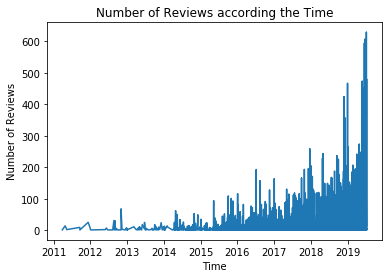

In [59]:
plt.plot(data.index, 'number_of_reviews', data=data)
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews according the Time')
plt.show()

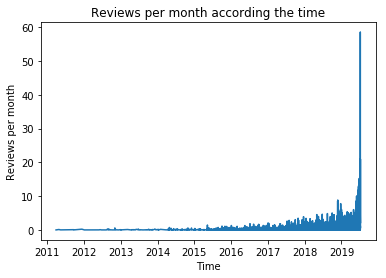

In [61]:
plt.plot(data.index, 'reviews_per_month', data=data) 
plt.xlabel('Time')
plt.ylabel('Reviews per month')
plt.title('Reviews per month according the time')
plt.show()

# Les 25 Host_id ayant gagné le plus d'argent

In [78]:
data.groupby(data['host_id'])['price'].sum().sort_values(ascending = False)[:25]

host_id
219517861    55920
205031545    24194
836168       19500
1177497      14850
16098958     12080
61391963     11425
30283594     10466
20582832     10000
5143901      10000
1235070       9999
3906464       9999
69545883      9339
18128455      8500
22541573      8380
107434423     7991
262534951     7560
172611460     7500
2119276       7440
96098402      7428
7503643       7321
417504        6962
120762452     6810
113805886     6293
2151325       6000
224414117     5796
Name: price, dtype: int64

# Le quartier ayant rapporter le plus d'argent

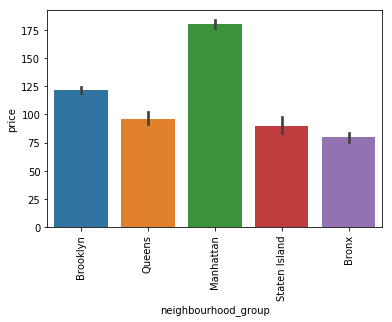

In [86]:
ax = sns.barplot(x="neighbourhood_group", y="price", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()